In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

from speclib import misc, plotting, loaders

import json

%matplotlib inline 

In [2]:
with open('../temp/userDataCount.json') as fid:
    js = json.load(fid)


data = dict(el.popitem() for el in js)

df = pd.DataFrame(data).T

In [3]:
df.head() 

,bluetooth_log.txt,call_log.p,call_log.txt,correlations.txt~,facebook_log.txt,gps_log.p,gps_log.txt,question_log.txt,screen_log.txt,sms_log.txt
0010fedde8e61cad5b049da6df8b5a,52857.0,NaN,685.0,NaN,695.0,NaN,128968.0,289.0,12453.0,961.0
002ee26a0c38a1f77b7cdeab8046cd,0.0,NaN,0.0,NaN,319.0,NaN,0.0,292.0,0.0,0.0
0037c93a19a7e90580086b462ba11b,310610.0,NaN,716.0,NaN,310.0,NaN,442557.0,287.0,74577.0,3128.0
005b1e0298bde6b726156aefb8d88c,157415.0,NaN,618.0,NaN,165.0,NaN,42895.0,287.0,10714.0,614.0
009293317688cff54ad9ab799c4945,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [4]:
df.drop('correlations.txt~', axis=1, inplace=True)
df.drop('call_log.p', axis=1, inplace=True)
df.drop('gps_log.p', axis=1, inplace=True)

In [5]:
df.replace(0.0, np.NaN, inplace=True)

In [6]:
df.rename(columns=lambda s: s.split('_')[0], inplace=True)

In [7]:
df.head() 

,bluetooth,call,facebook,gps,question,screen,sms
0010fedde8e61cad5b049da6df8b5a,52857.0,685.0,695.0,128968.0,289.0,12453.0,961.0
002ee26a0c38a1f77b7cdeab8046cd,NaN,NaN,319.0,NaN,292.0,NaN,NaN
0037c93a19a7e90580086b462ba11b,310610.0,716.0,310.0,442557.0,287.0,74577.0,3128.0
005b1e0298bde6b726156aefb8d88c,157415.0,618.0,165.0,42895.0,287.0,10714.0,614.0
009293317688cff54ad9ab799c4945,NaN,NaN,NaN,NaN,NaN,NaN,NaN


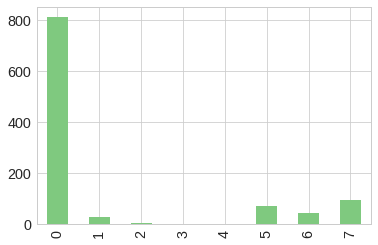

In [8]:
df.isnull().sum(axis=1).value_counts().sort_index().plot.bar() 

In [9]:
df = df[df.bluetooth.notnull()] 

In [10]:
df.head() 

,bluetooth,call,facebook,gps,question,screen,sms
0010fedde8e61cad5b049da6df8b5a,52857.0,685.0,695.0,128968.0,289.0,12453.0,961.0
0037c93a19a7e90580086b462ba11b,310610.0,716.0,310.0,442557.0,287.0,74577.0,3128.0
005b1e0298bde6b726156aefb8d88c,157415.0,618.0,165.0,42895.0,287.0,10714.0,614.0
00ad591e46eb6f3d8c474d9de9e219,3018.0,5.0,122.0,2424.0,284.0,301.0,26.0
00b602879b6f7d7e1d4223325e0cb2,165227.0,1222.0,406.0,452166.0,287.0,107382.0,19685.0


In [11]:
def load_bluetooth(user):
    try:
        with open(f'/lscr_paper/allan/telephone/{user}/bluetooth.json') as fid:
            data = json.load(fid)
        return data['bluetooth']
    except Exception as err:
        print(f"Couldn't read user {user}")
        print(err)

In [12]:
btdata = load_bluetooth('005b1e0298bde6b726156aefb8d88c')

In [13]:
type(btdata)

list

In [14]:
len(btdata)

157415

In [15]:
btdata[:3]

[{'bt_mac': '4c36ea4587be91d7c3049875b72bc3476ad709647ef75b6aef1d097ca0f5f3e4',
  'class': 7209228,
  'id': 1462053,
  'name': 'a64b876d4acaa00e05161e53e841812f',
  'rssi': -87,
  'scanned_user': '',
  'timestamp': 1378384175,
  'user': '005b1e0298bde6b726156aefb8d88c'},
 {'bt_mac': 'e06d76f943fa3c51fedadaebfa93f9c6b3c008c1c2953fb0fde3d1aeeefd6a7e',
  'class': 4063500,
  'id': 1462054,
  'name': 'eb5892246909a732ab610298c58165cb',
  'rssi': -88,
  'scanned_user': '',
  'timestamp': 1378384175,
  'user': '005b1e0298bde6b726156aefb8d88c'},
 {'bt_mac': '0b23db220425ec73e369071268354b3f4ae2650cb7ca6b68ef3edb28dc1781e1',
  'class': 5898764,
  'id': 1462055,
  'name': None,
  'rssi': -82,
  'scanned_user': 'f0ef3769fb2311ca15726c9bdfb5eb',
  'timestamp': 1378384175,
  'user': '005b1e0298bde6b726156aefb8d88c'}]

In [16]:
df = pd.DataFrame(btdata)

df.head()

,bt_mac,class,id,name,rssi,scanned_user,timestamp,user
0,4c36ea4587be91d7c3049875b72bc3476ad709647ef75b...,7209228,1462053,a64b876d4acaa00e05161e53e841812f,-87,,1378384175,005b1e0298bde6b726156aefb8d88c
1,e06d76f943fa3c51fedadaebfa93f9c6b3c008c1c2953f...,4063500,1462054,eb5892246909a732ab610298c58165cb,-88,,1378384175,005b1e0298bde6b726156aefb8d88c
2,0b23db220425ec73e369071268354b3f4ae2650cb7ca6b...,5898764,1462055,None,-82,f0ef3769fb2311ca15726c9bdfb5eb,1378384175,005b1e0298bde6b726156aefb8d88c
3,f8611c32163849aeb881f531ec64313dbde0cbf45a1ac3...,5898764,1462056,None,-87,2c4ad2fe7726d1a9e2c60bc58be868,1378384175,005b1e0298bde6b726156aefb8d88c
4,ae0a9b29bbc47690eeae87d7dea0788e44be79b4507d13...,5898764,1462057,d565ccd0b683ad49f3d1cdd5d02ae79e,-82,b7b98e1489e735d8ce4d30348efcc9,1378384175,005b1e0298bde6b726156aefb8d88c


In [17]:
df['timestamp'] = df.timestamp.astype('datetime64[s]')

In [18]:
df.head()

,bt_mac,class,id,name,rssi,scanned_user,timestamp,user
0,4c36ea4587be91d7c3049875b72bc3476ad709647ef75b...,7209228,1462053,a64b876d4acaa00e05161e53e841812f,-87,,2013-09-05 12:29:35,005b1e0298bde6b726156aefb8d88c
1,e06d76f943fa3c51fedadaebfa93f9c6b3c008c1c2953f...,4063500,1462054,eb5892246909a732ab610298c58165cb,-88,,2013-09-05 12:29:35,005b1e0298bde6b726156aefb8d88c
2,0b23db220425ec73e369071268354b3f4ae2650cb7ca6b...,5898764,1462055,None,-82,f0ef3769fb2311ca15726c9bdfb5eb,2013-09-05 12:29:35,005b1e0298bde6b726156aefb8d88c
3,f8611c32163849aeb881f531ec64313dbde0cbf45a1ac3...,5898764,1462056,None,-87,2c4ad2fe7726d1a9e2c60bc58be868,2013-09-05 12:29:35,005b1e0298bde6b726156aefb8d88c
4,ae0a9b29bbc47690eeae87d7dea0788e44be79b4507d13...,5898764,1462057,d565ccd0b683ad49f3d1cdd5d02ae79e,-82,b7b98e1489e735d8ce4d30348efcc9,2013-09-05 12:29:35,005b1e0298bde6b726156aefb8d88c


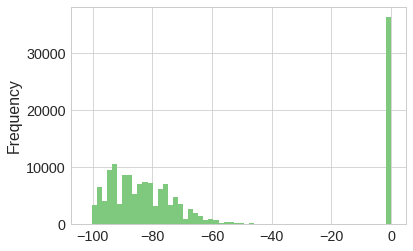

In [19]:
df.rssi.plot.hist(60)

In [20]:
df = df[df.bt_mac != '-1']

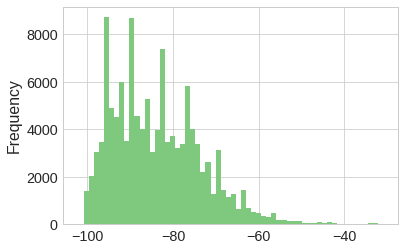

In [21]:
df.rssi.plot.hist(60) 

In [22]:
df.bt_mac.isnull().sum() 

0

In [23]:
userSet = set(el for el in os.listdir('../../telephone') if len(el) == 30)

In [24]:
df = df[df.scanned_user.isin(userSet)]

In [25]:
df = df.set_index('timestamp')

In [26]:
df.head() 

,bt_mac,class,id,name,rssi,scanned_user,user
timestamp,,,,,,,
2013-09-05 12:29:35,0b23db220425ec73e369071268354b3f4ae2650cb7ca6b...,5898764,1462055,None,-82,f0ef3769fb2311ca15726c9bdfb5eb,005b1e0298bde6b726156aefb8d88c
2013-09-05 12:29:35,f8611c32163849aeb881f531ec64313dbde0cbf45a1ac3...,5898764,1462056,None,-87,2c4ad2fe7726d1a9e2c60bc58be868,005b1e0298bde6b726156aefb8d88c
2013-09-05 12:29:35,ae0a9b29bbc47690eeae87d7dea0788e44be79b4507d13...,5898764,1462057,d565ccd0b683ad49f3d1cdd5d02ae79e,-82,b7b98e1489e735d8ce4d30348efcc9,005b1e0298bde6b726156aefb8d88c
2013-09-05 12:29:35,662085e9e762e5452ed30d85ea2cedc0793c7c59b07519...,5898764,1462060,d565ccd0b683ad49f3d1cdd5d02ae79e,-82,48af4a10320be434da71b1ae045fd1,005b1e0298bde6b726156aefb8d88c
2013-09-05 12:29:35,b58f4485bcf37ccb6fe05032b1bed9f4914a1903bb5f48...,5898764,1462061,None,-81,2626d4ba091a17213934b2bc2ade22,005b1e0298bde6b726156aefb8d88c


In [27]:
ua = loaders.Useralias()  

In [28]:
ua = loaders.Useralias() 
df['scanned_user'] = df.scanned_user.map(ua.userdct)
df['user'] = df.user.map(ua.userdct)
df.head() 

,bt_mac,class,id,name,rssi,scanned_user,user
timestamp,,,,,,,
2013-09-05 12:29:35,0b23db220425ec73e369071268354b3f4ae2650cb7ca6b...,5898764,1462055,None,-82,u1003,u0004
2013-09-05 12:29:35,f8611c32163849aeb881f531ec64313dbde0cbf45a1ac3...,5898764,1462056,None,-87,u0196,u0004
2013-09-05 12:29:35,ae0a9b29bbc47690eeae87d7dea0788e44be79b4507d13...,5898764,1462057,d565ccd0b683ad49f3d1cdd5d02ae79e,-82,u0787,u0004
2013-09-05 12:29:35,662085e9e762e5452ed30d85ea2cedc0793c7c59b07519...,5898764,1462060,d565ccd0b683ad49f3d1cdd5d02ae79e,-82,u0315,u0004
2013-09-05 12:29:35,b58f4485bcf37ccb6fe05032b1bed9f4914a1903bb5f48...,5898764,1462061,None,-81,u0172,u0004


In [33]:
df = df[df.index.year >= 2013]